<center>
<img src="img/ml_theme.png">
# Вводный курс по нейронным сетям
<center>
**Автор материала: программист-исследователь Mail.Ru Group  Юрий Кашницкий**

# <center> Часть 6. Сверточная сеть на PyTorch с CIFAR10
<center> На основе [этого](http://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html) тьюториала.

In [1]:
import warnings
warnings.filterwarnings('ignore')
%matplotlib inline
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
import numpy as np
import pandas as pd
import torch
import torchvision
import torchvision.transforms as transforms
from torch.autograd import Variable
import torch.nn as nn
import torch.nn.functional as F

**Загружаем данные.**

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

trainset = torchvision.datasets.CIFAR10(root='.',
                                        download=False, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=32,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='.',
                                       download=False, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=32,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

 ship truck   cat   car


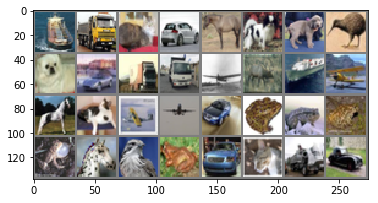

In [3]:
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join('%5s' % classes[labels[j]] for j in range(4)))

**Указываем архитектуру сети.**

In [4]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = x.view(-1, 16 * 5 * 5)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()
if torch.cuda.is_available():
    net.cuda()

Net(
  (conv1): Conv2d(3, 6, kernel_size=(5, 5), stride=(1, 1))
  (pool): MaxPool2d(kernel_size=(2, 2), stride=(2, 2), dilation=(1, 1), ceil_mode=False)
  (conv2): Conv2d(6, 16, kernel_size=(5, 5), stride=(1, 1))
  (fc1): Linear(in_features=400, out_features=120, bias=True)
  (fc2): Linear(in_features=120, out_features=84, bias=True)
  (fc3): Linear(in_features=84, out_features=10, bias=True)
)

**Указываем функцию потерь и оптимизатор.**

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(net.parameters(), lr=0.001)

**Обучаем мини-батчами, всего 10 эпох.**

In [6]:
%%time
losses = []

for epoch in tqdm_notebook(range(10)):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs
        inputs, labels = data

        # wrap them in Variable
        if torch.cuda.is_available():
            inputs, labels = Variable(inputs.cuda()), \
                            Variable(labels.cuda())
        else:
            inputs, labels = Variable(inputs), \
                        Variable(labels)
        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.data[0]
        if (i+1) % 100 == 0:   # print every 100 mini-batches
            print('[%d, %5d] loss: %.3f' %
                  (epoch + 1, i + 1, running_loss / 100))
            losses.append(running_loss)
            running_loss = 0.0
        
print('Finished Training')

HBox(children=(IntProgress(value=0, max=10), HTML(value='')))

[1,   100] loss: 2.126
[1,   200] loss: 1.935
[1,   300] loss: 1.840
[1,   400] loss: 1.730
[1,   500] loss: 1.672
[1,   600] loss: 1.613
[1,   700] loss: 1.589
[1,   800] loss: 1.565
[1,   900] loss: 1.541
[1,  1000] loss: 1.501
[1,  1100] loss: 1.526
[1,  1200] loss: 1.462
[1,  1300] loss: 1.483
[1,  1400] loss: 1.442
[1,  1500] loss: 1.452
[2,   100] loss: 1.415
[2,   200] loss: 1.399
[2,   300] loss: 1.407
[2,   400] loss: 1.369
[2,   500] loss: 1.401
[2,   600] loss: 1.376
[2,   700] loss: 1.351
[2,   800] loss: 1.352
[2,   900] loss: 1.307
[2,  1000] loss: 1.318
[2,  1100] loss: 1.314
[2,  1200] loss: 1.317
[2,  1300] loss: 1.297
[2,  1400] loss: 1.326
[2,  1500] loss: 1.302
[3,   100] loss: 1.256
[3,   200] loss: 1.264
[3,   300] loss: 1.250
[3,   400] loss: 1.234
[3,   500] loss: 1.221
[3,   600] loss: 1.231
[3,   700] loss: 1.222
[3,   800] loss: 1.205
[3,   900] loss: 1.167
[3,  1000] loss: 1.204
[3,  1100] loss: 1.217
[3,  1200] loss: 1.206
[3,  1300] loss: 1.201
[3,  1400] 

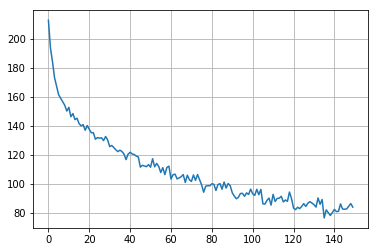

In [7]:
plt.grid(True)
plt.plot(losses);

**Прогноз для первого тестового мини-батча.**

GroundTruth:   frog truck truck  deer


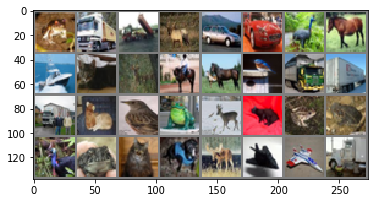

In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join('%5s' % classes[labels[j]] for j in range(4)))

In [9]:
if torch.cuda.is_available():
    outputs = net(Variable(images.cuda()))
else:
    outputs = net(Variable(images)

In [10]:
_, predicted = torch.max(outputs.data, 1)

print('Predicted: ', ' '.join('%5s' % classes[predicted[j]]
                              for j in range(4)))

Predicted:    dog truck truck  deer


**Теперь прогноз для всего теста.**

In [11]:
correct, total = 0, 0
for images, labels in testloader:
    if torch.cuda.is_available():
        images, labels = images.cuda(), labels.cuda()
    images = Variable(images)
    outputs = net(images)
    _, predicted = torch.max(outputs.data, 1)
    total += labels.size(0)
    correct += (predicted == labels.sum()

print('Test Accuracy of the model on the 10000 test images: %d %%' % (100 * correct / total))

Test Accuracy of the model on the 10000 test images: 72 %
